Zadanie polegało na wygenerowaniu wyników dla poszczególnych nastaw parametrów sieci oraz przedstawieniu oraz ich zinterpretowaniu. 
Do wygenerowania wyników użyto parametrów sieci takich jak:
* miara centralności
* procentowa ilość seedów ze wszytkich najlepszych
* prawdopodobieństwo propagacji
Przygotowanie wyniki należało pogrupować i przedstawić w formie poszczególnych wykresów badając przebieg zarażeń dla poszczególnych ustawień.
Eksperyment przeprowadzono przy pomocy modelu niezależnych kaskad.

Importy

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Pomocnicza klasa do generowania poszczególnych wykresów badających właściwości modeli z parametrami.

In [2]:
class GraphModelGenerator:
    def __init__(self, save: bool = True, save_filepath: str = './images/results'):
        self.save = save
        self.save_filepath = save_filepath

        self._default_filepath_data: str = './results_main.csv'
        self._file = self.__read_file()

    def generate_mean_coverage_by_network(self, filename: str = 'mean_coverage_by_network.png'):
        network_uniques = self._file['Network'].unique()
        network_uniques = np.array(list(map(lambda name: name.replace('.txt', ''), network_uniques)))
        network_uniques.sort()
        mean_coverage_by_network = self._file.groupby(['Network'], sort=True)['IF'].mean()

        plot_title = 'Mean coverage by network'
        self.__bar(network_uniques, mean_coverage_by_network, plot_title, filename, xlabel='Network', ylabel='Coverage (%)')

    def generate_mean_coverage_by_pp(self, filename: str = 'mean_coverage_by_pp.png'):
        pp_uniques = self._file['PP'].unique()
        pp_uniques = list(map(lambda name: str(name), pp_uniques))
        mean_coverage_by_pp = self._file.groupby(['PP'])['IF'].mean()

        plot_title = 'Mean coverage by propagation probability'
        self.__bar(pp_uniques, mean_coverage_by_pp, plot_title, filename, xlabel='Propagation probability', ylabel='Coverage (%)')

    def generate_mean_coverage_by_sf(self, filename: str = 'mean_coverage_by_sf.png'):
        sf_uniques = self._file['SF'].unique()
        sf_uniques = list(map(lambda name: str(name), sf_uniques))
        mean_coverage_by_sf = self._file.groupby(['SF'])['IF'].mean()

        plot_title = 'Mean coverage by seed fraction'
        self.__bar(sf_uniques, mean_coverage_by_sf, plot_title, filename, xlabel='Seed fraction', ylabel='Coverage (%)')

    def generate_mean_coverage_by_measure(self, filename: str = 'mean_coverage_by_measure.png'):
        measure_uniques = self._file['Measure'].unique()
        mean_coverage_by_measure = self._file.groupby(['Measure'])['IF'].mean()

        plot_title = 'Mean coverage by measure'
        self.__bar(measure_uniques, mean_coverage_by_measure, plot_title, filename, xlabel='Measure', ylabel='Coverage (%)')

    def generate_mean_steps_by_network(self, filename: str = 'mean_steps_by_network.png'):
        network_uniques = self._file['Network'].unique()
        network_uniques = np.array(list(map(lambda name: name.replace('.txt', ''), network_uniques)))
        network_uniques.sort()
        mean_steps_by_network = self._file.groupby(['Network'])['Iterations count'].mean()

        plot_title = 'Mean steps by network'
        self.__bar(network_uniques, mean_steps_by_network, plot_title, filename, xlabel='Network', ylabel='Steps')

    def generate_mean_steps_by_pp(self, filename: str = 'mean_steps_by_pp.png'):
        pp_uniques = self._file['PP'].unique()
        pp_uniques = list(map(lambda name: str(name), pp_uniques))
        mean_steps_by_pp = self._file.groupby(['PP'])['Iterations count'].mean()

        plot_title = 'Mean steps by propagation probability'
        self.__bar(pp_uniques, mean_steps_by_pp, plot_title, filename, xlabel='Propagation probability', ylabel='Steps')

    def generate_mean_steps_by_sf(self, filename: str = 'mean_steps_by_sf.png'):
        sf_uniques = self._file['SF'].unique()
        sf_uniques = list(map(lambda name: str(name), sf_uniques))
        mean_steps_by_sf = self._file.groupby(['SF'])['Iterations count'].mean()

        plot_title = 'Mean steps by seed fraction'
        self.__bar(sf_uniques, mean_steps_by_sf, plot_title, filename, xlabel='Seed fraction', ylabel='Steps')

    def generate_mean_steps_by_measure(self, filename: str = 'mean_steps_by_measure.png'):
        measure_uniques = self._file['Measure'].unique()
        mean_steps_by_measure = self._file.groupby(['Measure'])['Iterations count'].mean()

        plot_title = 'Mean steps by measure'
        self.__bar(measure_uniques, mean_steps_by_measure, plot_title, filename, xlabel='Measure', ylabel='Steps')

    def generate_max_coverage_by_method(self, filename: str = 'max_coverage_by_method.png'):
        max_coverage_by_measure = self._file.groupby(['Network', 'Measure'])['IF'].max()
        names = list(map(lambda name: name.replace('.txt', ''), self._file['Network'].unique()))

        plot_title = 'Max coverage by measure'
        x = np.arange(len(names))
        width = 0.25

        fig, ax = plt.subplots(figsize=(20, 10))
        rects1 = ax.bar(x - width / 0.8, max_coverage_by_measure[::3], width, label='degree')
        rects2 = ax.bar(x, max_coverage_by_measure[1::3], width, label='closeness')
        rects3 = ax.bar(x + width / 0.8, max_coverage_by_measure[2::3], width, label='random')

        ax.set_xticks(x, names)
        ax.set_xlabel('Network Name')
        ax.set_ylabel('Infection coverage (%)')
        ax.legend(loc='lower right')

        ax.bar_label(rects1, padding=5)
        ax.bar_label(rects2, padding=5)
        ax.bar_label(rects3, padding=5)

        ax.set_title(plot_title)
        plt.savefig(f'{self.save_filepath}/{filename}') if self.save else plt.show()
        plt.close(fig)

    def generate_max_coverage_by_sf(self, filename: str = 'max_coverage_by_sf.png'):
        max_coverage_by_measure = self._file.groupby(['Network', 'SF'])['IF'].max()
        names = list(map(lambda name: name.replace('.txt', ''), self._file['Network'].unique()))

        plot_title = 'Max coverage by seed fraction'
        x = np.arange(len(names))
        width = 0.25

        fig, ax = plt.subplots(figsize=(20, 10))
        rects1 = ax.bar(x - width / 0.8, max_coverage_by_measure[::3], width, label='5%')
        rects2 = ax.bar(x, max_coverage_by_measure[1::3], width, label='10%')
        rects3 = ax.bar(x + width / 0.8, max_coverage_by_measure[2::3], width, label='25%')

        ax.set_xticks(x, names)
        ax.set_xlabel('Network Name')
        ax.set_ylabel('Infection coverage (%)')
        ax.legend(loc='lower right')

        ax.bar_label(rects1, padding=5)
        ax.bar_label(rects2, padding=5)
        ax.bar_label(rects3, padding=5)

        ax.set_title(plot_title)
        plt.savefig(f'{self.save_filepath}/{filename}') if self.save else plt.show()
        plt.close(fig)

    def generate_max_coverage_by_method_and_pp(self, filename: str = 'max_coverage_by_method_and_pp.png'):
        grouped_by_network_and_column = self._file.groupby(['Network', 'Measure'])

    def __read_file(self, filepath: str = None) -> pd.DataFrame:
        return pd.read_csv(self._default_filepath_data if filepath is None else filepath)

    def __bar(self, names: np.array, values, title: str, filename: str, **kwargs):
        fig = plt.figure(figsize=(20, 10))
        plt.bar(names, values, color='g', width=0.3 if 'width' not in kwargs.keys() else kwargs['width'])
        plt.title(title)

        if 'xlabel' in kwargs.keys():
            plt.xlabel(kwargs['xlabel'])
        if 'ylabel' in kwargs.keys():
            plt.ylabel(kwargs['ylabel'])

        plt.savefig(f'{self.save_filepath}/{filename}') if self.save else plt.show()
        plt.close(fig)


Utworzenie obiektu klasy generatora do generowania wykresów.

In [3]:
graph_model_generator = GraphModelGenerator(save=False)

Poniższy wykres przedstawia średni procent pokrycia poszczególnych sieci zarażeniem, przedstawiając które sieci zarażają się lepiej, a które słabiej.
Jak widać struktura sieci 12 jest lepsza do przenoszenia informacji w sieci niż struktura sieci 4.

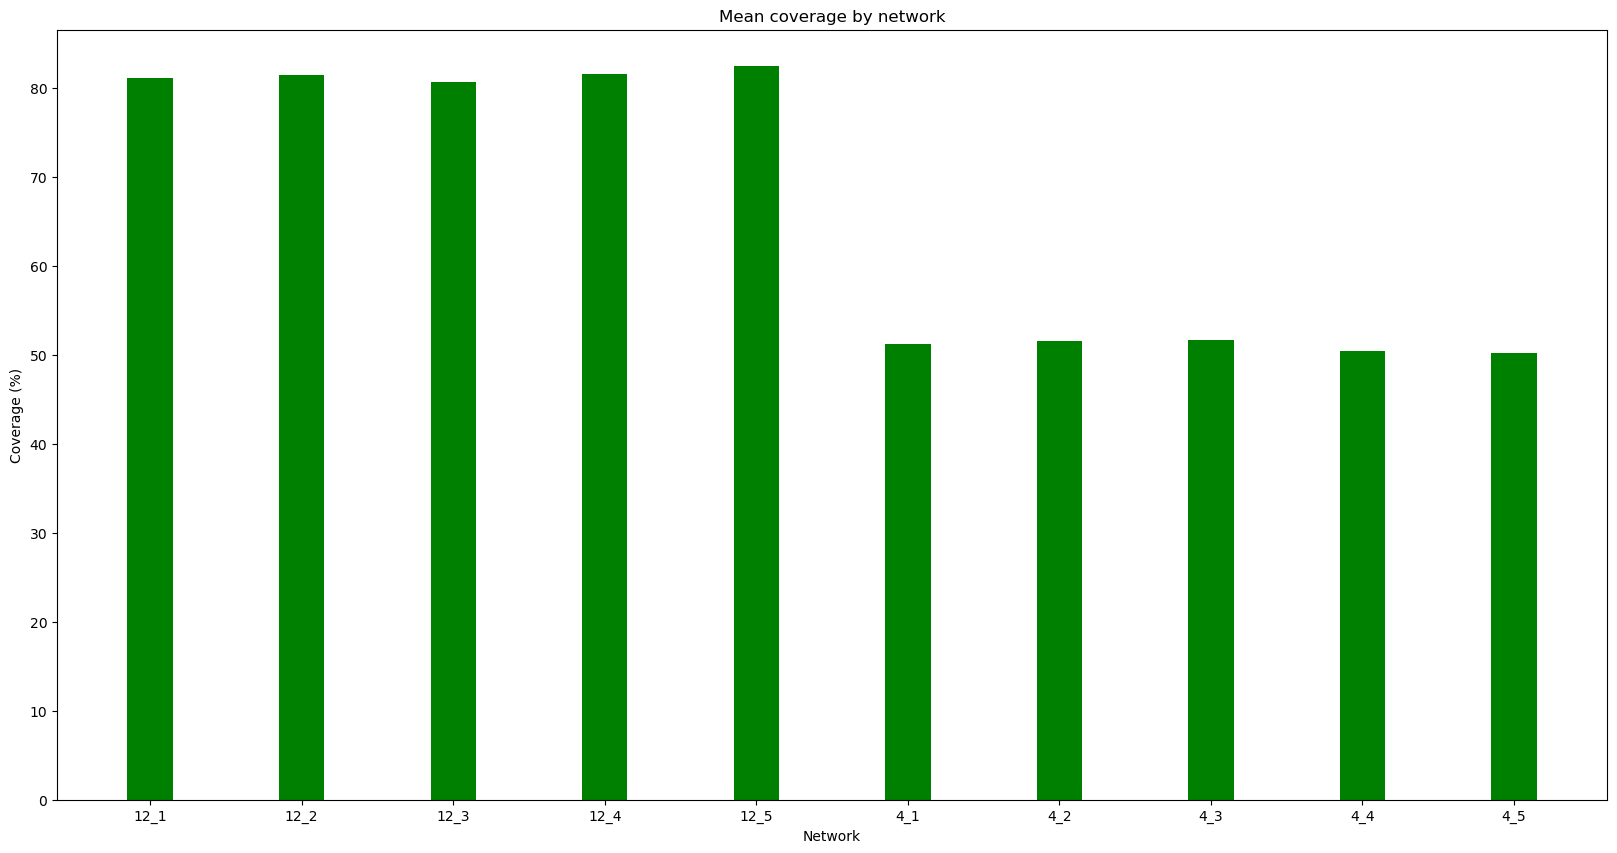

In [4]:
graph_model_generator.generate_mean_coverage_by_network()

Poniższy wykres przedstawia średni procent pokrycia wszystkich sieci na każde prawdopodobieństwo propagacji. Dane są przedstawione niezależnie od poszczególnych metod oraz procentowej ilości seedów.
Pokrycie sieci jest proporcjonalne do prawdopodobieństwa propagacji.

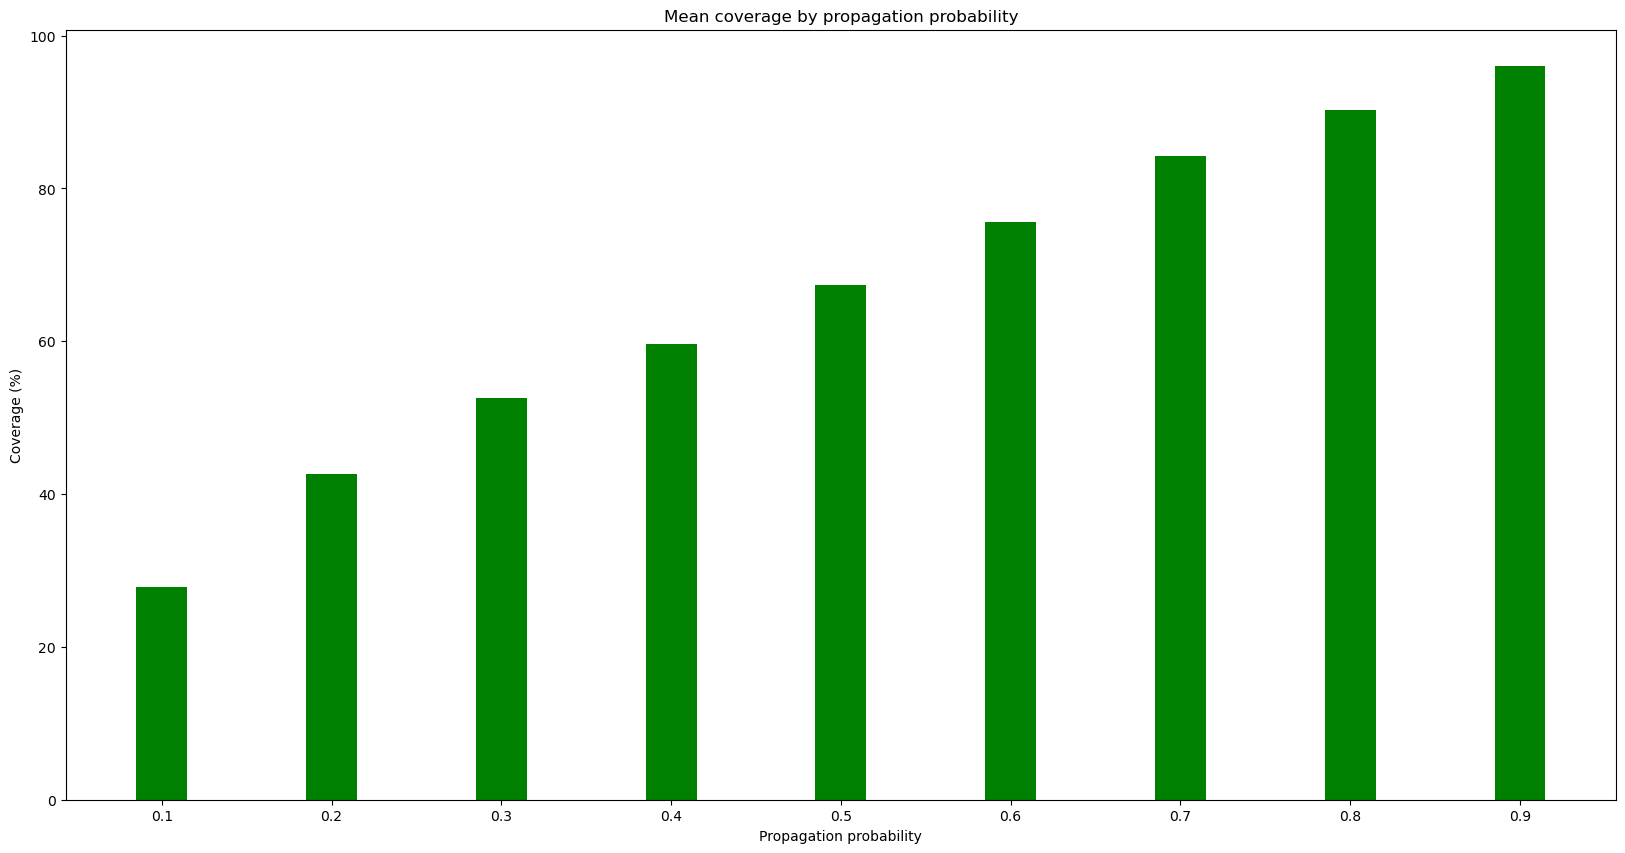

In [5]:
graph_model_generator.generate_mean_coverage_by_pp()

Poniższy wykres przedstawia średni procent pokrycie wszystkich sieci na każdy przypadek procentowej ilości seedów, wybranych jako pierwszych najlepszych wyliczonych miarami centralności.
Im więcej początkowych seedów wyznaczymy jako zarażone, tym więcej sieci zostanie pokryte infekcją.

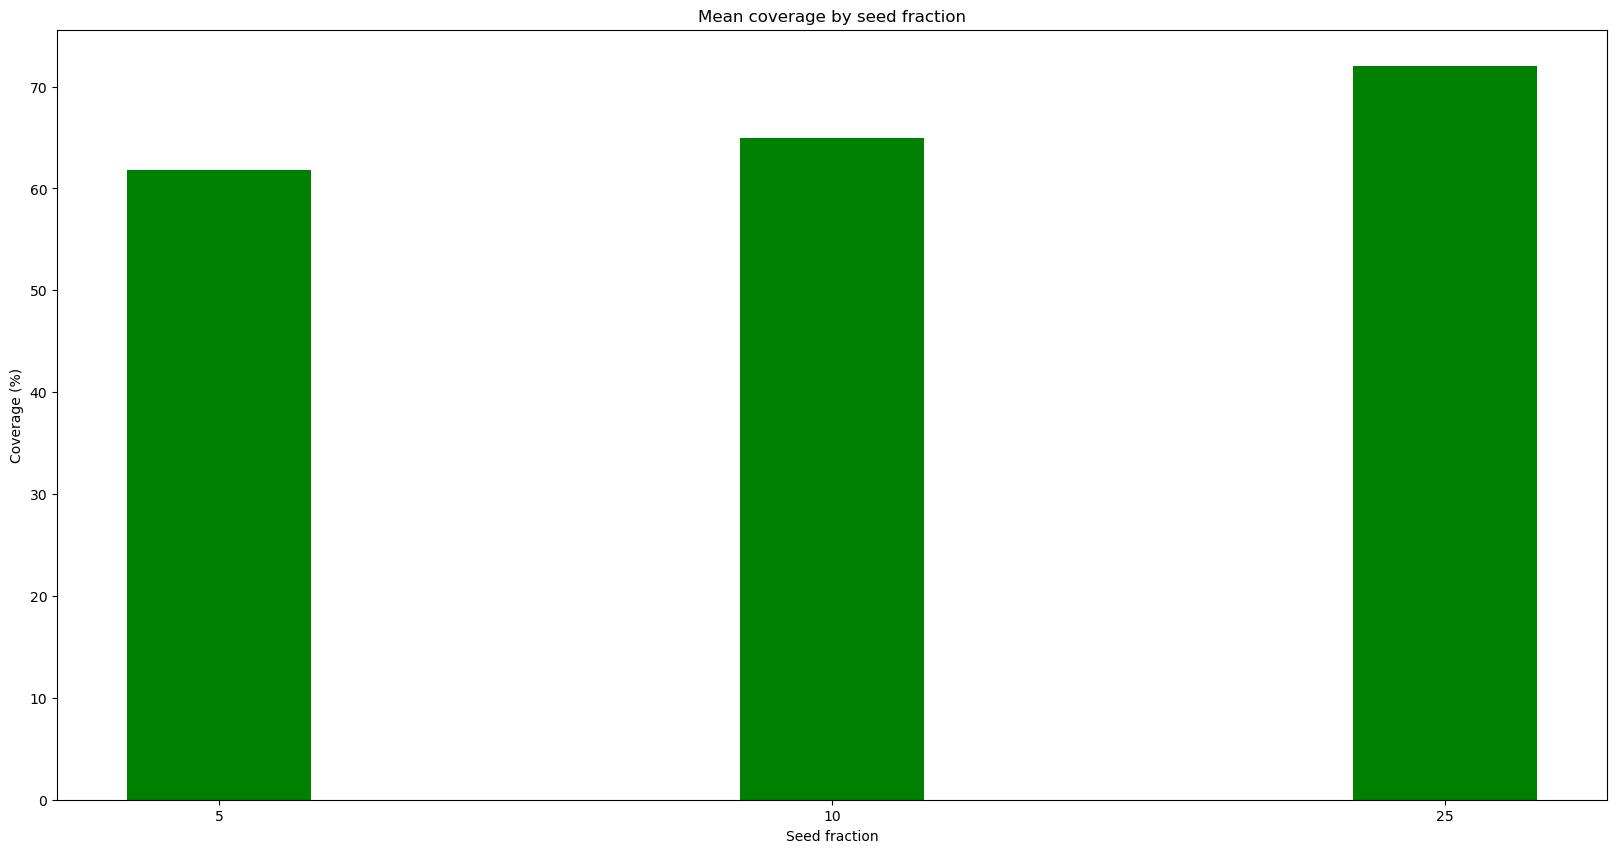

In [6]:
graph_model_generator.generate_mean_coverage_by_sf()

Poniższy wykres przedstawia średnie pokrycie wszystkich sieci przez każdą z metod.
Dziwnym trafem dla wszytkich sieci najlepiej poradził sobie random, jednak może to być czysty przypadek. Z zastosowaniem miara centralności closeness większa część sieci została pokryta infekcją. 

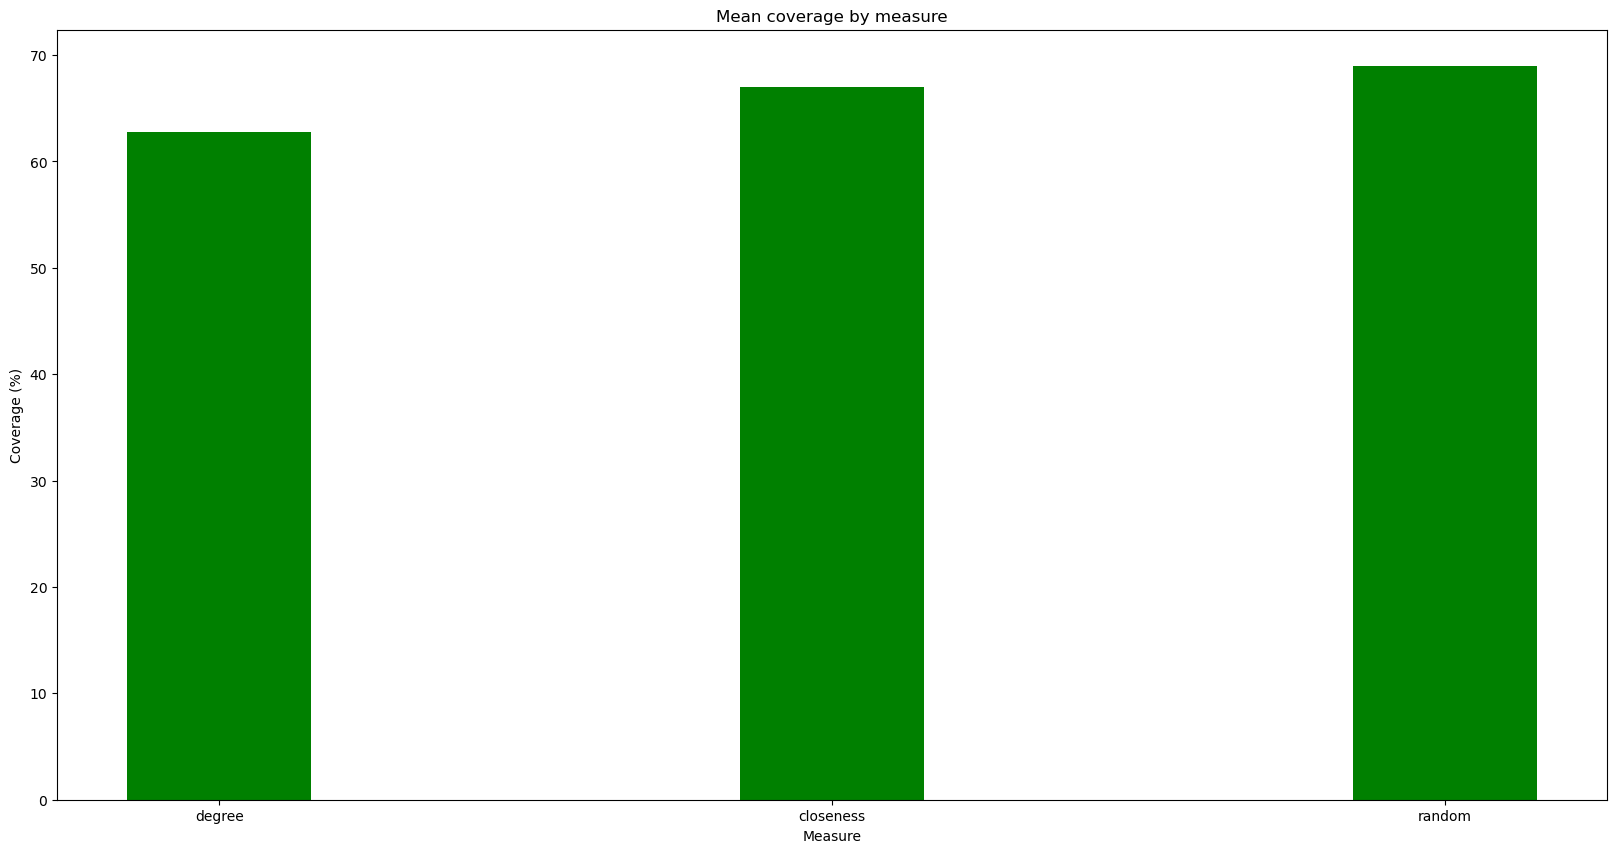

In [7]:
graph_model_generator.generate_mean_coverage_by_measure()

Poniższy wykres przedstawia średnią liczbę kroków potrzebną do zakończenia zarażania sieci na każdą sieć.
Sieć 12 znacznie szybciej kończy zarażanie niż sieć 4. Pomimo to sieć 12 jest pokryta infekcją większym stopniu niż sieć 4 (wykres powyżej). 

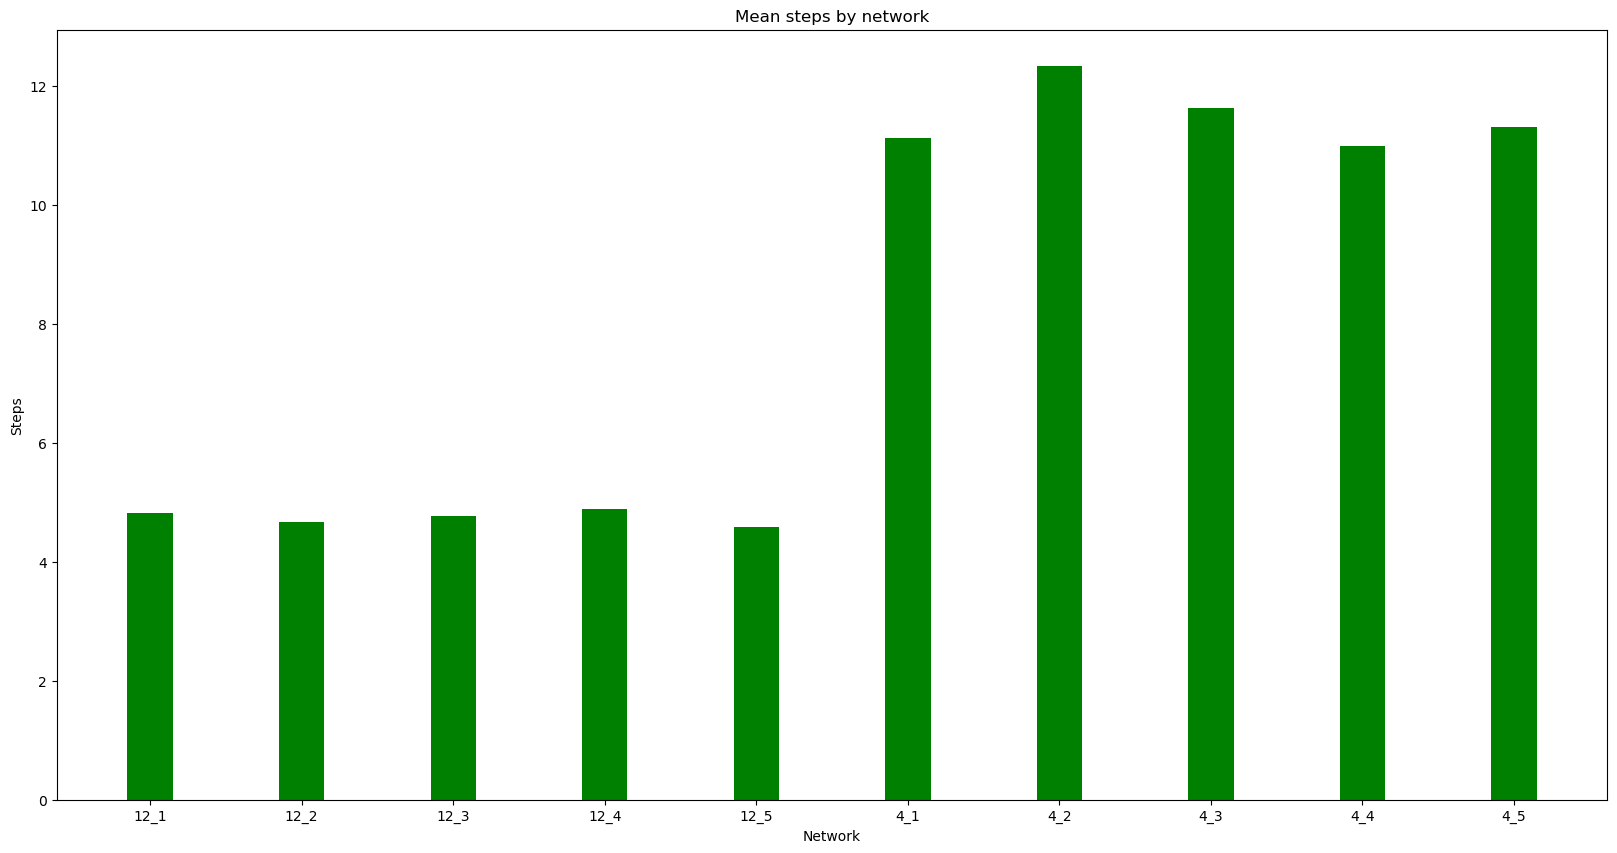

In [8]:
graph_model_generator.generate_mean_steps_by_network()

Poniższy wykres przedstawia średnią liczbę kroków potrzebną do zakończenia zarażania sieci poprzez prawdopodobieństwo propagacji.
Prawodpodobieństwo propagacji równe 0.7 wymagało największej liczby kroków do zakończenia procesu zarażania, jednak nie przyniosło to dla modelu większej ilości zarażeń.

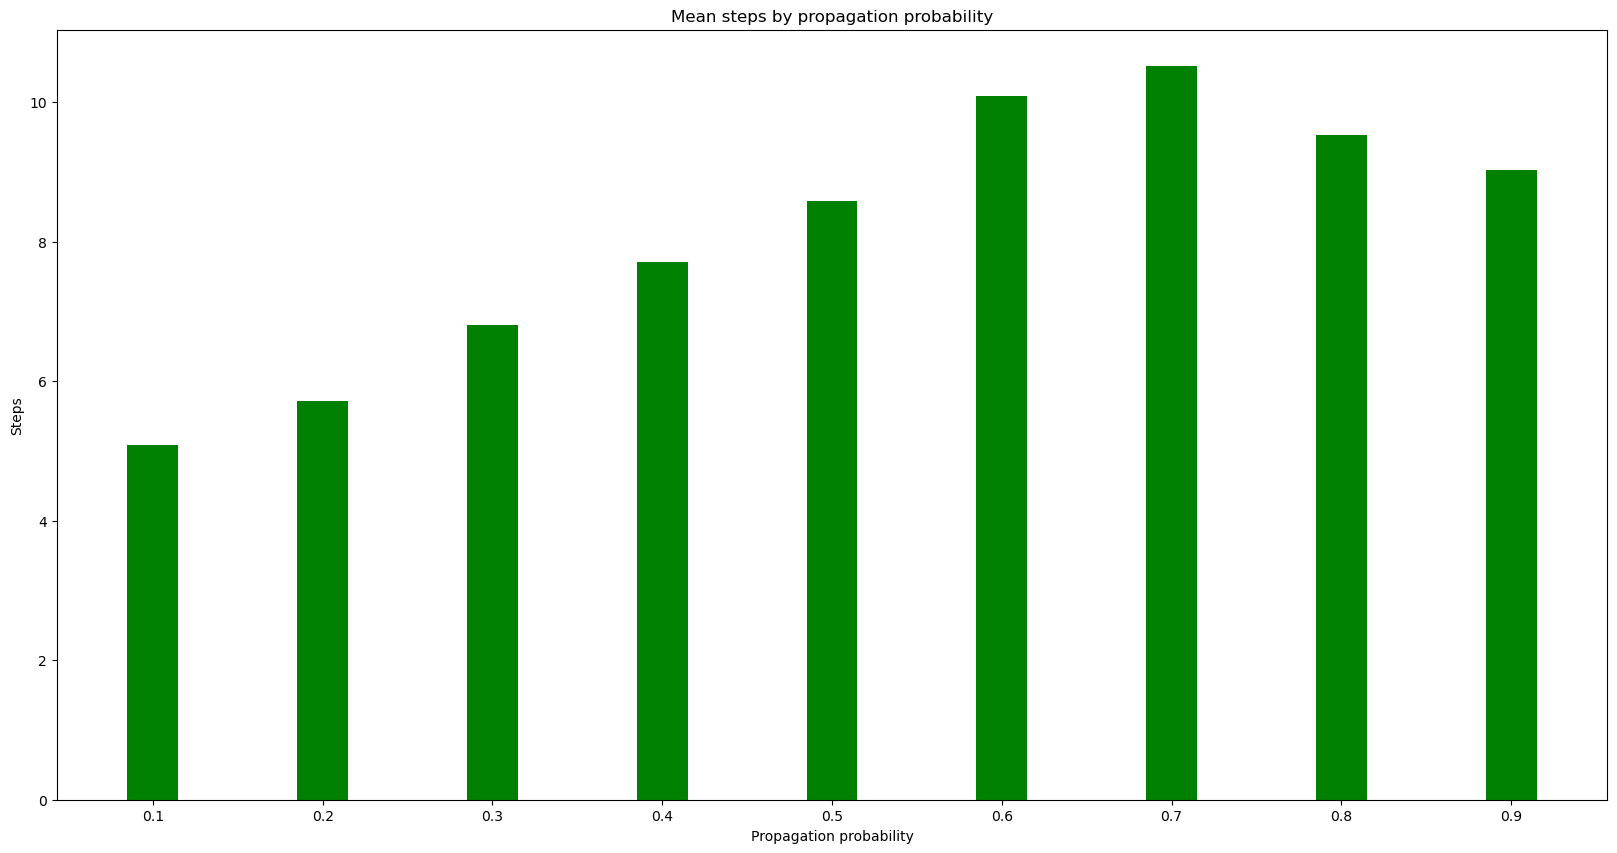

In [9]:
graph_model_generator.generate_mean_steps_by_pp()

Poniższy wykres przedstawia średnią liczbę kroków potrzebną do zakończenia zarażania sieci ze względu na procentową ilość seedów.
Najwięcej kroków wymagane jest dla małej liczby seedów początkowych, wymagając większej ilości sprawdzania zarażeń i przechodzenia przez całą sieć. Im więcej początkowych seedów tym łatwiej zarażać sieć oraz mniej kroków jest wymagane do zakończenia zarażania.

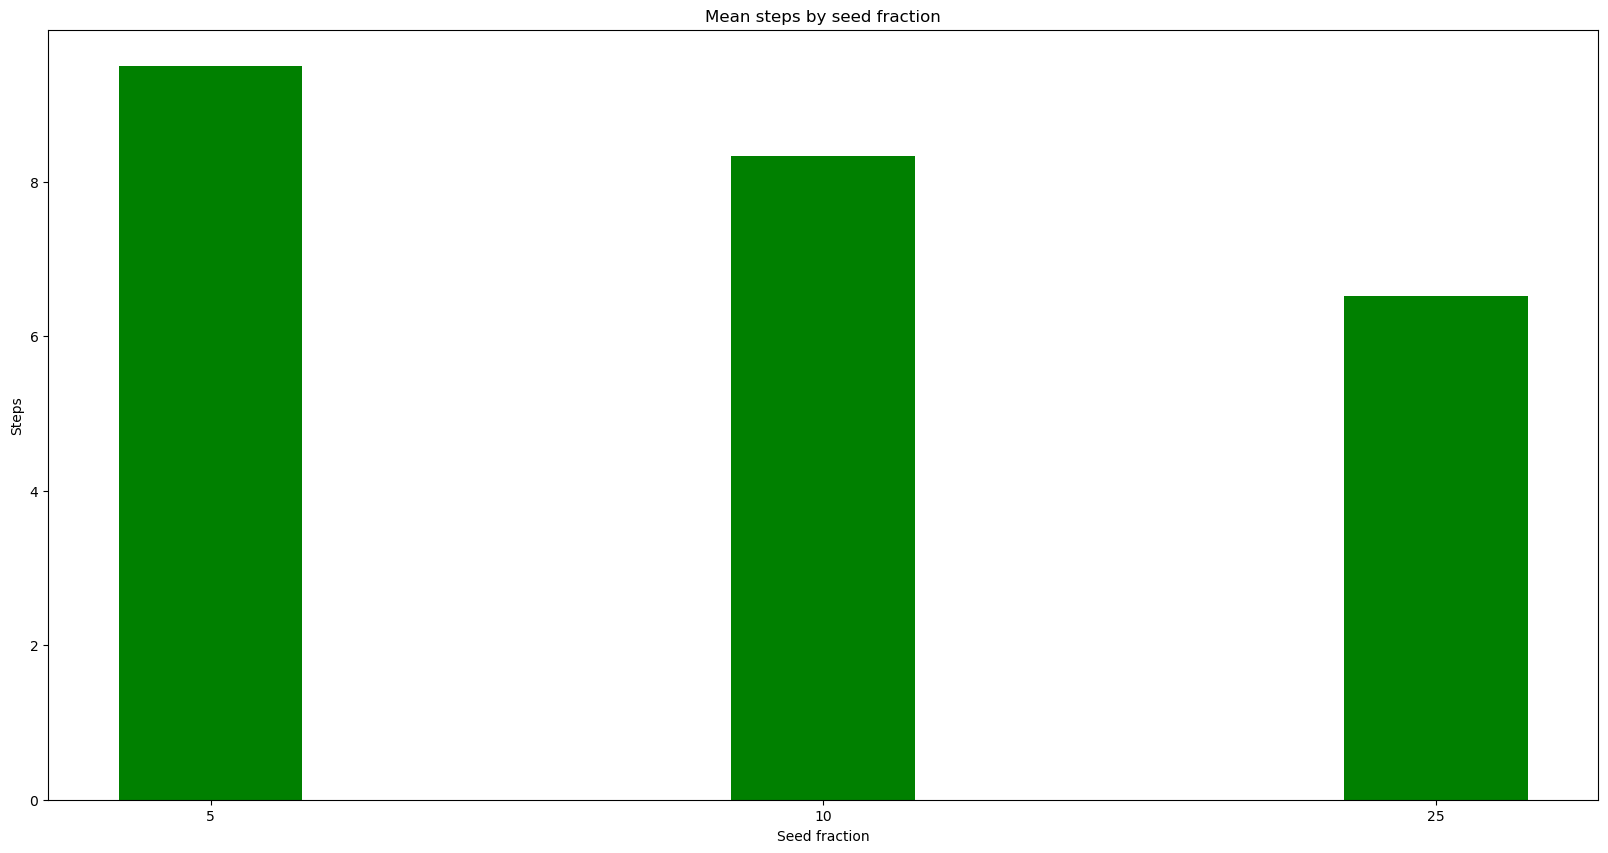

In [10]:
graph_model_generator.generate_mean_steps_by_sf()

Poniższy wykres przedstawia średnią liczbę kroków potrzebną do zakończenia zarażania sieci przypadające na każdą metodę.
Najwięcej kroków zarażania wymagane było dla miary centralności degree, natomiast najmniej dla miary centralności closeness.

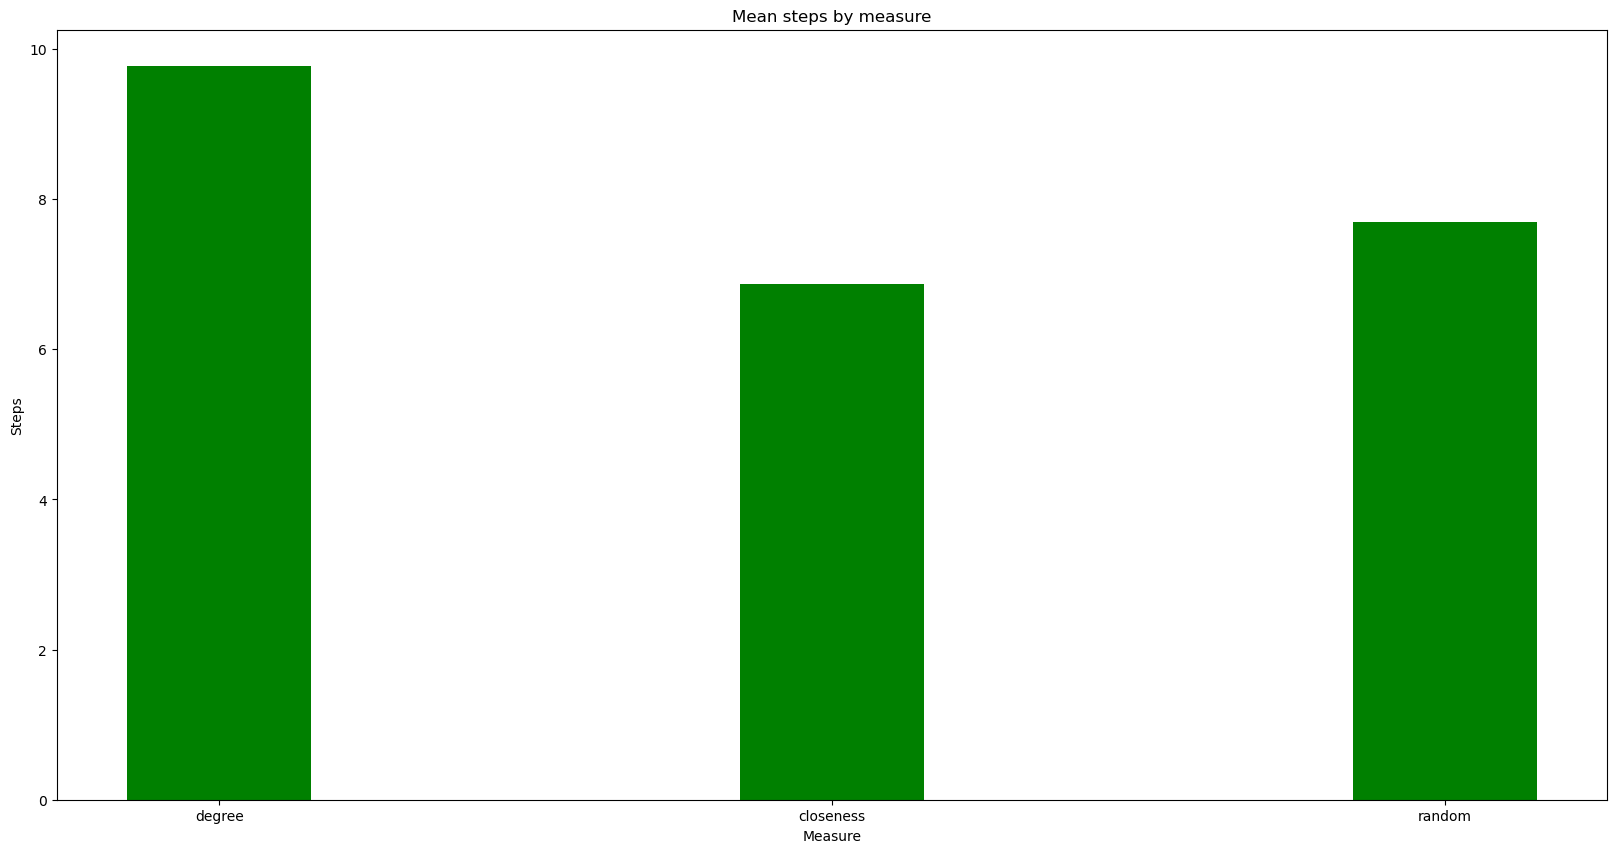

In [11]:
graph_model_generator.generate_mean_steps_by_measure()

Poniższy wykres przedstawia maksymalne pokrycie poszczególnych sieci przy wykorzystaniu poszczególnych metod.
Każda miara centralności jest w stanie tak dobrać seedy początkowe, aby skutecznie zarazić sieć w bardzo dużym procencie.
Miary closeness oraz degree dokonują zarażeń na zbliżonym poziomie.

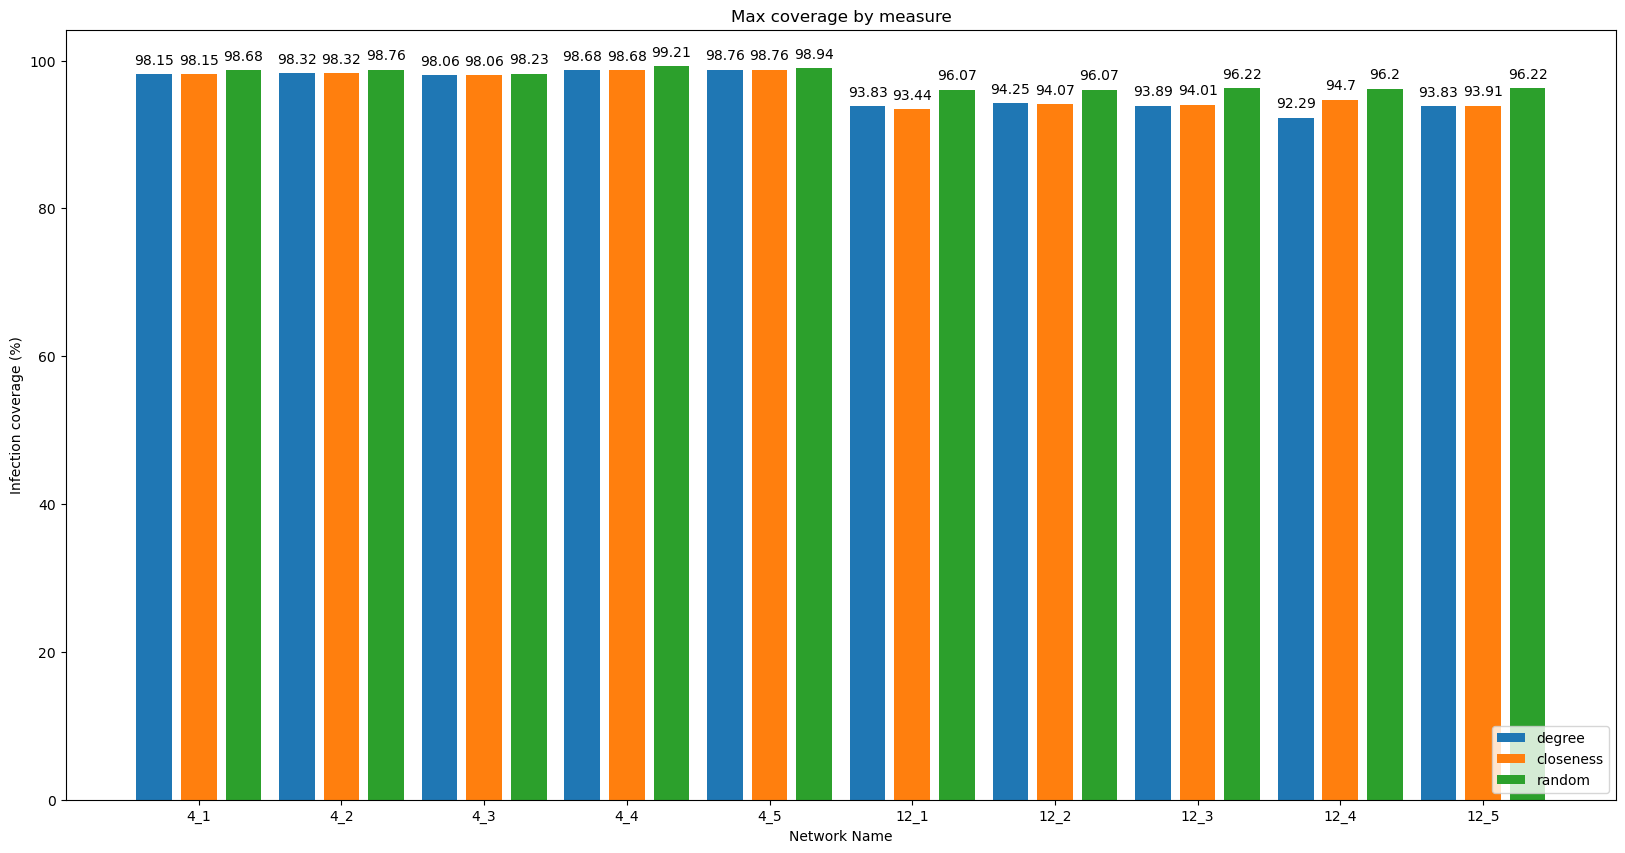

In [12]:
graph_model_generator.generate_max_coverage_by_method()

Poniższy wykres przedstawia maksymalne pokrycie poszczególnych sieci z podziałem na procentowe wykorzystanie ilości seedów wyliczonych za pomocą miar centralności.
Każda sieć może zostać zarażona w wysokim procencie z wykorzystaniem dowolnej liczby początkowych seedów niezależnie od wyliczenia ich miarą centralności.
Im większa liczba początkowych zarażonych seedów tym większy procent sieci zostanie zarażony.

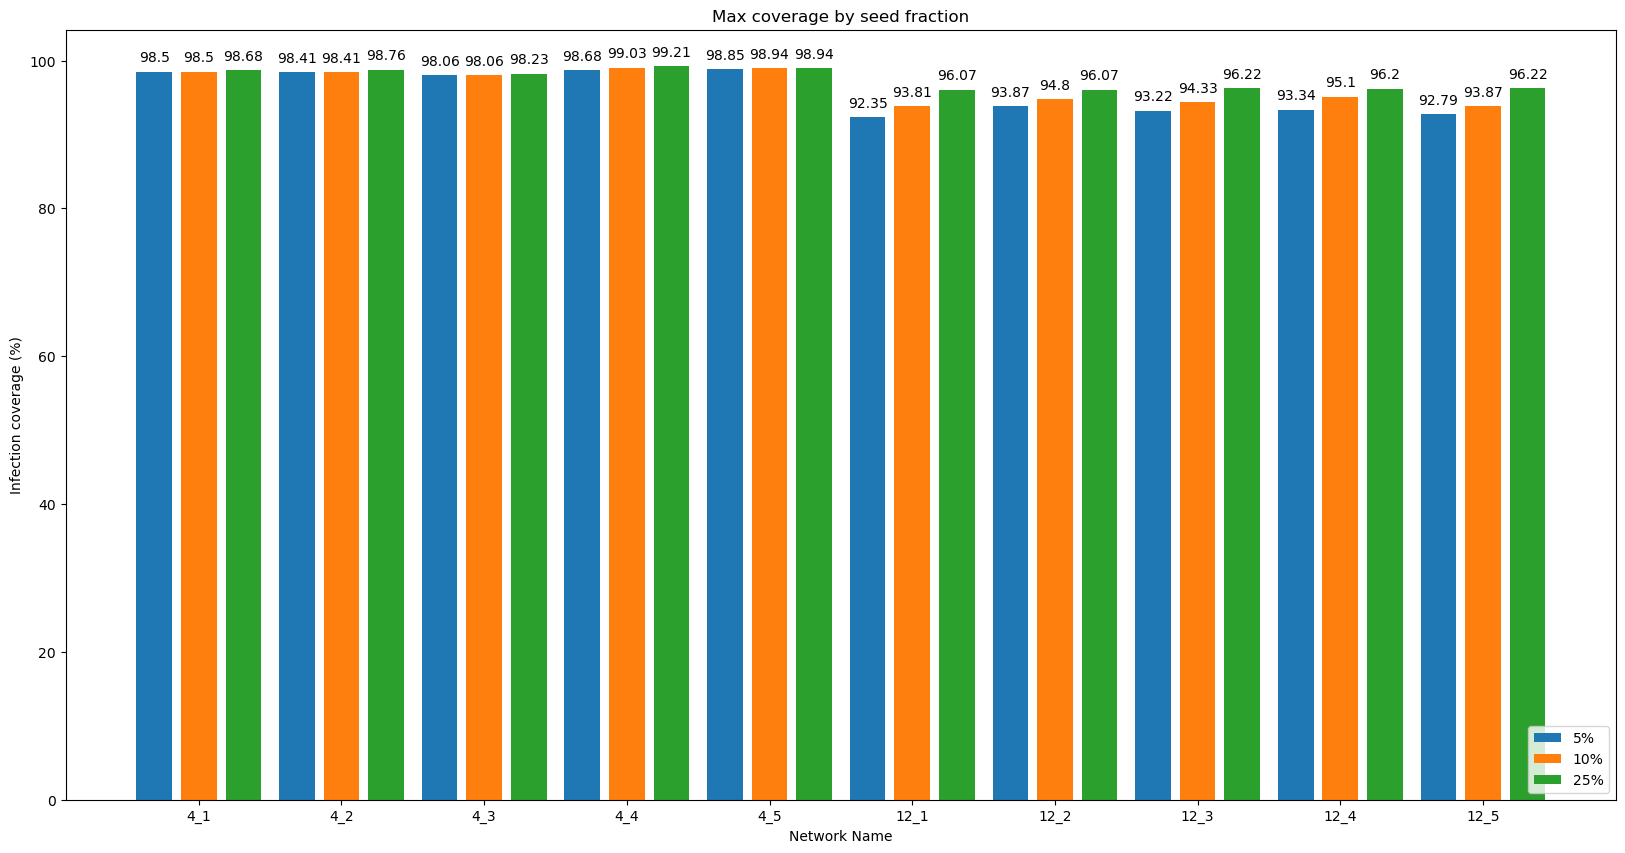

In [13]:
graph_model_generator.generate_max_coverage_by_sf()

Wnioski:
* Wraz z większą liczbą początkowych seedów jesteśmy w stanie zarazić większą część sieci oraz mniej iteracji musimy wykonać.
* Niektóre sieci mają strukturę, w której łatwo zarażać informacją. W niektórych nie zawsze taka struktura sprzyja łatwemu roznoszeniu infekcji.
* Prawdopodobieństwo propagacji ma wpływ na liczbę kroków potrzebnych do zakończenia zarażania sieci, a tym samym na czas oczekiwania na resultat zarażenia danej sieci.
* Duża liczba kroków nie oznacza większego procentowego pokrycia sieci zarażeniem, co jest widoczne dla sieci 4 i 12.